<a href="https://colab.research.google.com/github/AHQJOHN/Pytorch_with_jovian/blob/main/Pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [4]:
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
len(dataset)

60000

In [6]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

Label: 5


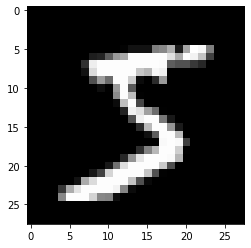

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 0


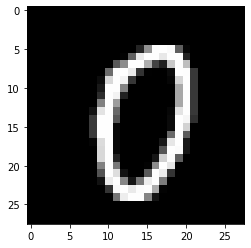

In [8]:
image, label = dataset[1000]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


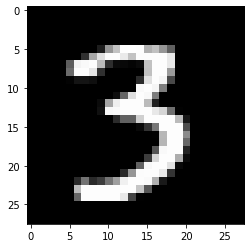

In [9]:
image, label = dataset[10000]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [10]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


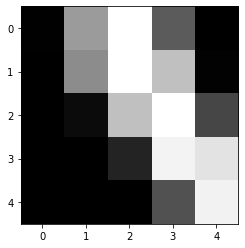

In [13]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0130, -0.0187, -0.0072,  ...,  0.0122,  0.0251,  0.0239],
        [ 0.0141,  0.0224,  0.0054,  ...,  0.0015,  0.0164, -0.0011],
        [ 0.0232,  0.0035,  0.0269,  ..., -0.0194, -0.0098, -0.0225],
        ...,
        [-0.0015,  0.0300,  0.0296,  ..., -0.0316, -0.0157,  0.0294],
        [ 0.0248,  0.0177,  0.0196,  ..., -0.0031, -0.0179,  0.0052],
        [-0.0030,  0.0356,  0.0319,  ...,  0.0215,  0.0066,  0.0121]],
       requires_grad=True)

In [18]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0262,  0.0095,  0.0279,  0.0242,  0.0132, -0.0094, -0.0128, -0.0178,
         0.0133, -0.0241], requires_grad=True)

In [19]:
for images, labels in train_loader:
    print(labels)
    images = images.reshape(128, 784)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([8, 6, 6, 0, 0, 6, 4, 2, 3, 8, 1, 3, 9, 2, 1, 7, 9, 0, 6, 8, 1, 6, 5, 8,
        4, 0, 3, 4, 1, 6, 3, 3, 9, 2, 3, 4, 9, 4, 3, 4, 3, 1, 0, 5, 3, 9, 5, 0,
        9, 8, 5, 1, 1, 1, 7, 1, 2, 1, 6, 4, 7, 2, 8, 5, 1, 0, 1, 1, 1, 9, 9, 2,
        3, 5, 8, 7, 6, 8, 9, 9, 3, 2, 1, 8, 2, 7, 9, 1, 2, 2, 2, 3, 3, 1, 1, 2,
        1, 1, 3, 3, 2, 9, 9, 7, 5, 4, 2, 5, 0, 2, 7, 3, 6, 3, 1, 4, 8, 2, 6, 5,
        2, 4, 0, 9, 9, 0, 9, 9])
torch.Size([128, 784])
tensor([[ 0.1744,  0.0767, -0.0968,  ..., -0.1626, -0.1608,  0.1245],
        [ 0.3001, -0.1605, -0.2169,  ...,  0.0450, -0.0995,  0.2431],
        [ 0.1671, -0.2056, -0.1314,  ...,  0.2745,  0.2744,  0.0539],
        ...,
        [ 0.4582,  0.1076, -0.2156,  ..., -0.2839, -0.0727,  0.1473],
        [ 0.0813, -0.1020,  0.0711,  ...,  0.0158,  0.1589,  0.1875],
        [ 0.4295, -0.1596, -0.3639,  ..., -0.1559,  0.3069,  0.0446]],
       grad_fn=<AddmmBackward0>)


In [20]:
# images = train_loader[0]
images.shape

torch.Size([128, 784])

In [21]:
images.reshape(128, 784).shape

torch.Size([128, 784])

### Iterate Over Dataloader

In [22]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


In [23]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age
  def say_hello(self):
    print("Hello my_name is "+self.name+" !")

In [24]:
john = Person("John",30)

In [25]:
john.name, john.age

('John', 30)

In [26]:
john.say_hello()

Hello my_name is John !


In [27]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)  
        # Leaving 1st dimention empty to fillup by divition calculating from all the elements of the tensor
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [28]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [29]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0241, -0.0259,  0.0286,  ..., -0.0350, -0.0311,  0.0016],
         [-0.0176, -0.0333, -0.0320,  ...,  0.0284,  0.0333,  0.0099],
         [-0.0168, -0.0223,  0.0088,  ..., -0.0181,  0.0068, -0.0130],
         ...,
         [-0.0162,  0.0129, -0.0310,  ..., -0.0023, -0.0212,  0.0329],
         [ 0.0082,  0.0014,  0.0262,  ...,  0.0218,  0.0316,  0.0193],
         [ 0.0113, -0.0351,  0.0074,  ...,  0.0118,  0.0130,  0.0150]],
        requires_grad=True), Parameter containing:
 tensor([-0.0128, -0.0332,  0.0263, -0.0019, -0.0272, -0.0130,  0.0083,  0.0332,
         -0.0091,  0.0338], requires_grad=True)]

In [30]:
for images, labels in train_loader:
    print(images.shape, labels.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28]) torch.Size([128])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1168, -0.3815,  0.1130,  0.1781, -0.3759, -0.4248, -0.5415,  0.0829,
          0.0052, -0.3054],
        [ 0.0736, -0.0247,  0.0341,  0.0484, -0.2148, -0.1422,  0.0950, -0.1996,
         -0.0081, -0.0633]])


In [31]:
print('Sample outputs :\n', outputs[0].data)

Sample outputs :
 tensor([-0.1168, -0.3815,  0.1130,  0.1781, -0.3759, -0.4248, -0.5415,  0.0829,
         0.0052, -0.3054])


In [32]:
import torch.nn.functional as F

In [33]:
probs = F.softmax(outputs, dim=1)
probs

tensor([[0.1030, 0.0790, 0.1296,  ..., 0.1258, 0.1164, 0.0853],
        [0.1114, 0.1010, 0.1071,  ..., 0.0848, 0.1027, 0.0972],
        [0.0962, 0.0880, 0.1099,  ..., 0.1281, 0.1159, 0.0993],
        ...,
        [0.0703, 0.0936, 0.1002,  ..., 0.1148, 0.1412, 0.0956],
        [0.1473, 0.0756, 0.0924,  ..., 0.1089, 0.1010, 0.0848],
        [0.1036, 0.0898, 0.1093,  ..., 0.1024, 0.1137, 0.0897]],
       grad_fn=<SoftmaxBackward0>)

In [34]:
print("Sample probabilities:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1030, 0.0790, 0.1296, 0.1383, 0.0795, 0.0757, 0.0674, 0.1258, 0.1164,
         0.0853],
        [0.1114, 0.1010, 0.1071, 0.1087, 0.0835, 0.0898, 0.1138, 0.0848, 0.1027,
         0.0972]])
Sum:  0.9999999403953552


In [35]:
torch.max(probs[0]).item()

0.13833603262901306

In [36]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([3, 6, 7, 3, 0, 2, 8, 7, 8, 0, 3, 0, 3, 3, 8, 8, 0, 0, 2, 0, 8, 0, 5, 2,
        8, 9, 8, 3, 0, 7, 3, 0, 8, 8, 7, 3, 8, 6, 3, 8, 2, 0, 0, 3, 8, 0, 8, 2,
        2, 0, 0, 2, 8, 8, 0, 3, 0, 3, 2, 8, 3, 3, 3, 5, 9, 3, 0, 3, 8, 2, 0, 9,
        2, 0, 0, 7, 0, 9, 0, 3, 2, 8, 2, 0, 3, 2, 7, 0, 8, 6, 2, 3, 7, 0, 2, 3,
        8, 3, 2, 2, 8, 3, 2, 7, 3, 8, 2, 0, 4, 9, 3, 3, 0, 2, 8, 3, 7, 8, 3, 3,
        8, 7, 0, 8, 2, 8, 0, 3])
tensor([0.1383, 0.1138, 0.1281, 0.1137, 0.1312, 0.1149, 0.1228, 0.1620, 0.1143,
        0.1295, 0.1373, 0.1308, 0.1158, 0.1337, 0.1226, 0.1194, 0.1091, 0.1329,
        0.1289, 0.1279, 0.1169, 0.1189, 0.1296, 0.1179, 0.1207, 0.1196, 0.1270,
        0.1142, 0.1161, 0.1428, 0.1211, 0.1213, 0.1214, 0.1356, 0.1321, 0.1250,
        0.1401, 0.1248, 0.1511, 0.1249, 0.1201, 0.1250, 0.1257, 0.1233, 0.1135,
        0.1314, 0.1221, 0.1192, 0.1241, 0.1188, 0.1226, 0.1330, 0.1232, 0.1129,
        0.1308, 0.1436, 0.1293, 0.1353, 0.1378, 0.1464, 0.1304, 0.1248, 0.1518,
       

In [37]:
labels

tensor([0, 1, 7, 2, 1, 1, 6, 7, 8, 7, 9, 8, 1, 9, 4, 8, 9, 0, 1, 3, 4, 5, 2, 1,
        3, 5, 4, 1, 0, 7, 5, 5, 3, 2, 7, 6, 3, 3, 2, 4, 5, 3, 2, 7, 7, 3, 2, 1,
        5, 1, 4, 0, 8, 9, 0, 0, 7, 2, 2, 3, 6, 4, 2, 2, 4, 7, 8, 9, 4, 9, 7, 6,
        3, 8, 8, 2, 2, 6, 1, 2, 3, 3, 0, 2, 1, 9, 7, 7, 7, 6, 7, 4, 2, 1, 2, 1,
        8, 7, 1, 3, 4, 3, 3, 7, 9, 4, 0, 1, 6, 3, 8, 3, 1, 0, 9, 5, 2, 6, 0, 7,
        2, 7, 8, 2, 2, 4, 8, 2])

In [38]:
outputs[:2]

tensor([[-0.1168, -0.3815,  0.1130,  0.1781, -0.3759, -0.4248, -0.5415,  0.0829,
          0.0052, -0.3054],
        [ 0.0736, -0.0247,  0.0341,  0.0484, -0.2148, -0.1422,  0.0950, -0.1996,
         -0.0081, -0.0633]], grad_fn=<SliceBackward0>)

In [39]:
torch.sum(preds == labels)

tensor(20)

In [40]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [41]:
accuracy(outputs, labels)


tensor(0.1562)

In [42]:
loss_fn = F.cross_entropy

In [43]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2517, grad_fn=<NllLossBackward0>)


## Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem. 

We'll include the problem-independent parts within a function called `fit`, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the `nn.Module` class.


In [62]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [63]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [64]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    def forward(self, xb):
      xb = xb.reshape(-1,784)
      out  = self.linear(xb)
      return out
    def training_step(self, batch):
      images, labels = batch
      out = self(images)  # this one for generating predictions
      loss = F.cross_entropy(out, labels) # loss
      return loss
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()    




In [65]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3207955360412598, 'val_acc': 0.09493670612573624}

In [66]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9475, val_acc: 0.6244
Epoch [1], val_loss: 1.6802, val_acc: 0.7271
Epoch [2], val_loss: 1.4806, val_acc: 0.7618
Epoch [3], val_loss: 1.3299, val_acc: 0.7806
Epoch [4], val_loss: 1.2137, val_acc: 0.7962


In [67]:
history1 

[{'val_loss': 1.9475306272506714, 'val_acc': 0.624406635761261},
 {'val_loss': 1.6801639795303345, 'val_acc': 0.7270569801330566},
 {'val_loss': 1.4806312322616577, 'val_acc': 0.7617682218551636},
 {'val_loss': 1.3298695087432861, 'val_acc': 0.7805577516555786},
 {'val_loss': 1.2136781215667725, 'val_acc': 0.7961827516555786}]

In [68]:
%%time
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1225, val_acc: 0.8066
Epoch [1], val_loss: 1.0491, val_acc: 0.8144
Epoch [2], val_loss: 0.9890, val_acc: 0.8200
Epoch [3], val_loss: 0.9390, val_acc: 0.8243
Epoch [4], val_loss: 0.8966, val_acc: 0.8279
CPU times: user 42.7 s, sys: 99 ms, total: 42.8 s
Wall time: 44.1 s


In [69]:
%%time
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8603, val_acc: 0.8310
Epoch [1], val_loss: 0.8288, val_acc: 0.8350
Epoch [2], val_loss: 0.8013, val_acc: 0.8382
Epoch [3], val_loss: 0.7769, val_acc: 0.8408
Epoch [4], val_loss: 0.7552, val_acc: 0.8433
CPU times: user 43.1 s, sys: 95.2 ms, total: 43.2 s
Wall time: 43.6 s


In [70]:
%%time
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7357, val_acc: 0.8444
Epoch [1], val_loss: 0.7181, val_acc: 0.8461
Epoch [2], val_loss: 0.7022, val_acc: 0.8479
Epoch [3], val_loss: 0.6876, val_acc: 0.8487
Epoch [4], val_loss: 0.6742, val_acc: 0.8502
CPU times: user 42.5 s, sys: 108 ms, total: 42.6 s
Wall time: 42.7 s


In [71]:
%%time
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6619, val_acc: 0.8517
Epoch [1], val_loss: 0.6505, val_acc: 0.8529
Epoch [2], val_loss: 0.6400, val_acc: 0.8534
Epoch [3], val_loss: 0.6301, val_acc: 0.8544
Epoch [4], val_loss: 0.6210, val_acc: 0.8555
CPU times: user 42.8 s, sys: 109 ms, total: 42.9 s
Wall time: 43.1 s


In [74]:
history6 = fit(30, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6124, val_acc: 0.8571
Epoch [1], val_loss: 0.6043, val_acc: 0.8579
Epoch [2], val_loss: 0.5968, val_acc: 0.8584
Epoch [3], val_loss: 0.5896, val_acc: 0.8605
Epoch [4], val_loss: 0.5829, val_acc: 0.8614
Epoch [5], val_loss: 0.5765, val_acc: 0.8622
Epoch [6], val_loss: 0.5704, val_acc: 0.8629
Epoch [7], val_loss: 0.5647, val_acc: 0.8643
Epoch [8], val_loss: 0.5593, val_acc: 0.8649
Epoch [9], val_loss: 0.5540, val_acc: 0.8659
Epoch [10], val_loss: 0.5491, val_acc: 0.8665
Epoch [11], val_loss: 0.5443, val_acc: 0.8674
Epoch [12], val_loss: 0.5398, val_acc: 0.8679
Epoch [13], val_loss: 0.5355, val_acc: 0.8686
Epoch [14], val_loss: 0.5313, val_acc: 0.8689
Epoch [15], val_loss: 0.5273, val_acc: 0.8693
Epoch [16], val_loss: 0.5235, val_acc: 0.8699
Epoch [17], val_loss: 0.5198, val_acc: 0.8704
Epoch [18], val_loss: 0.5162, val_acc: 0.8707
Epoch [19], val_loss: 0.5128, val_acc: 0.8709
Epoch [20], val_loss: 0.5095, val_acc: 0.8714
Epoch [21], val_loss: 0.5063, val_acc: 0.871

In [77]:
history7 = fit(20, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4634, val_acc: 0.8780
Epoch [1], val_loss: 0.4467, val_acc: 0.8823
Epoch [2], val_loss: 0.4334, val_acc: 0.8865
Epoch [3], val_loss: 0.4225, val_acc: 0.8884
Epoch [4], val_loss: 0.4129, val_acc: 0.8904
Epoch [5], val_loss: 0.4050, val_acc: 0.8917
Epoch [6], val_loss: 0.3982, val_acc: 0.8924
Epoch [7], val_loss: 0.3919, val_acc: 0.8944
Epoch [8], val_loss: 0.3863, val_acc: 0.8954
Epoch [9], val_loss: 0.3816, val_acc: 0.8967
Epoch [10], val_loss: 0.3770, val_acc: 0.8978
Epoch [11], val_loss: 0.3731, val_acc: 0.8987
Epoch [12], val_loss: 0.3694, val_acc: 0.8990
Epoch [13], val_loss: 0.3661, val_acc: 0.9004
Epoch [14], val_loss: 0.3627, val_acc: 0.9006
Epoch [15], val_loss: 0.3600, val_acc: 0.9020
Epoch [16], val_loss: 0.3574, val_acc: 0.9020
Epoch [17], val_loss: 0.3547, val_acc: 0.9028
Epoch [18], val_loss: 0.3524, val_acc: 0.9040
Epoch [19], val_loss: 0.3502, val_acc: 0.9046


In [78]:
history = [result0] + history1 + history2 + history3 + history4 + history5 + history6 + history7


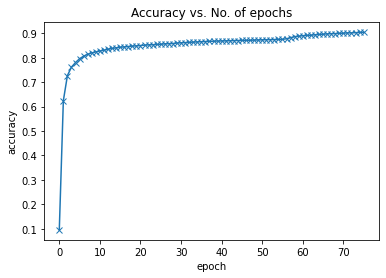

In [79]:
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');